In [1]:
##########################################################################
# Created on Sat Nov 07 19:04:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 8.5.1.Systematic and nonsystematic risk

In [1]:
import pandas as pd

price_stocks=pd.read_excel('Close price of SZ180(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
price_stocks.columns

Index(['王府井', '中国软件', '大智慧', '中航沈飞', '闻泰科技', '北京银行', '中国建筑', '大秦铁路', '长江电力',
       '万华化学',
       ...
       '中国核电', '工商银行', '陕西煤业', '保利地产', '招商银行', '光大证券', '南京银行', '国投电力', '中国中冶',
       '中国神华'],
      dtype='object', length=160)

In [2]:
price_stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
       '2020-12-25', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', name='日期', length=730)

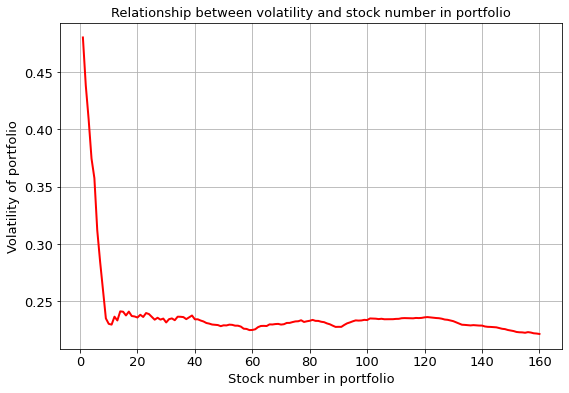

In [4]:
import numpy as np

return_stocks=np.log(price_stocks/price_stocks.shift(1))

n=len(return_stocks.columns)
vol_port=np.zeros(n)

for i in range(1,n+1):
    w=np.ones(i)/i
    cov=252*return_stocks.iloc[:,:i].cov()
    vol_port[i-1]=np.sqrt(np.dot(w,np.dot(cov,w.T)))

N_list=np.arange(n)+1

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(N_list,vol_port,'r-',lw=2.0)
plt.xlabel('Stock number in portfolio',fontsize=13)
plt.ylabel('Volatility of portfolio',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between volatility and stock number in portfolio',fontsize=13)
plt.grid()
plt.show()

# 8.5.2.CAPM

## 1.Expression of CAPM model

$$E(R_i)=R_F+\beta_i[E(R_M)-R_F]\tag{8-56}$$
or $$E(R_i)-R_F=\beta_i[E(R_M)-R_F]\tag{8-57}$$\
where,\
$E(R_i)$:expected return of the ith stock\
$R_F$:risk free rate\
$E(R_M)$:return on the market, representing price of systematic risk \
$E(R_M)-R_F$:market premium\
$E(R_i)-R_F$:risk premium\
$\beta_i$:measure the sensitivity of the expected return of the stock to the market return

In [5]:
def Ri_CAPM(beta,Rm,Rf):
    '''Define a function to calculate the expected return of the stock using CAPM
    beta:beta of the stock
    Rm:return on the market
    Rf:risk free rate'''
    Ri=Rf+beta*(Rm-Rf)
    return Ri

## 2.Calculate beta and expected return

Linear regression equation:\
$$R_{it}=\alpha_i+\beta_iR_{Mt}\tag{8-58}$$\
where,\
$R_{it}$:return of the ith stock in the past t\
$R_{Mt}$:return of the market in the past t

In [7]:
P_bank_index=pd.read_excel('Close price of CMB and HS300(2017-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
R_bank_index=np.log(P_bank_index/P_bank_index.shift(1))
R_bank_index=R_bank_index.dropna()
R_bank_index.describe()

,CMB,HS300
count,973.000000,973.000000
mean,0.000920,0.000457
std,0.017569,0.012141
min,-0.068975,-0.082088
25%,-0.009076,-0.005306
50%,0.000000,0.000446
75%,0.010596,0.006646
max,0.095211,0.057775


In [14]:
import statsmodels.api as sm

R_bank=R_bank_index['CMB']
R_index=R_bank_index['HS300']

R_index_addcons=sm.add_constant(R_index)
model=sm.OLS(endog=R_bank,exog=R_index_addcons)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMB   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     757.7
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          9.39e-124
Time:                        14:07:46   Log-Likelihood:                 2832.9
No. Observations:                 973   AIC:                            -5662.
Df Residuals:                     971   BIC:                            -5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.141      0.254      -0.000       0.001
HS300          0.9580      0.035     27.526      0.000       0.890       1.026
==============================================================================
Omnibus:                       64.762   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.725
Skew:                           0.367   Prob(JB):                     5.63e-35
Kurtosis:                       4.830   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result.params

const    0.000482
HS300    0.958032
dtype: float64

In [11]:
LPR_1Y=0.0385
R_market=252*R_index.mean()
R_stock=Ri_CAPM(beta=result.params[-1],Rm=R_market,Rf=LPR_1Y)
print('Annualized expected return of CMB is ',round(R_stock,6))

Annualized expected return of CMB is  0.11183


# 8.5.3.Security market line

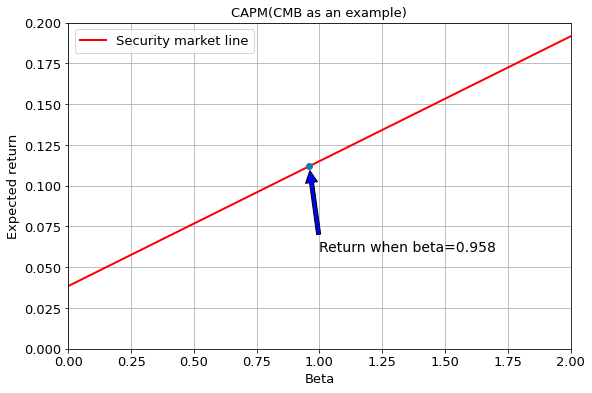

In [15]:
beta_list=np.linspace(0,2.0,100)

R_stock_list=Ri_CAPM(beta=beta_list,Rm=R_market,Rf=LPR_1Y)

plt.figure(figsize=(9,6))
plt.plot(beta_list,R_stock_list,'r-',label='Security market line',lw=2.0)
plt.plot(result.params[-1],R_stock,'o',lw=2.5)
plt.axis('tight')
plt.xlabel('Beta',fontsize=13)
plt.xlim(0,2.0)
plt.ylabel('Expected return',fontsize=13)
plt.ylim(0,0.2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('CAPM(CMB as an example)',fontsize=13)
plt.annotate('Return when beta=0.958',fontsize=14,xy=(0.96,0.1115),xytext=(1.0,0.06),arrowprops=dict(facecolor='b',shrink=0.05))
plt.legend(fontsize=13)
plt.grid()
plt.show()